<a href="https://colab.research.google.com/github/crislanecas/python/blob/main/Alura%26WoMakersCode/11_Resumo_correla%C3%A7%C3%A3o_e_regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação das bibliotecas

In [1]:
# Importa as bibliotecas.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Importa parte da biblioteca Scipy.
from scipy.stats import normaltest
from scipy.stats import t as t_student
from scipy.stats import chi2
from scipy.stats import f
from scipy.stats import kurtosis
from scipy.special import factorial

# Importação dos dados

In [3]:
# Importa parte da biblioteca do Google Colab para te acesso ao Google Drive, utilizando o método drive.mount().
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Cria um dataframe para receber os dados do arquivo CSV.
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bootcamp Data Analytics - WoMakersCode/Estatística - Alura/dados.csv')

In [5]:
# Cria uma dicionário com duas listas de dados, com gasto e renda famíliar.
dataset = {
    'Y': [3011, 1305, 1879, 2654, 2849, 1068, 2892, 2543, 3074, 849, 2184, 2943, 1357, 2755, 2163, 3099, 1600, 353, 1778, 740, 2129, 3302, 2412, 2683, 2515, 2395, 2292, 1000, 600, 1864, 3027, 1978, 2791, 1982, 900, 1964, 1247, 3067, 700, 1500, 3110, 2644, 1378, 2601, 501, 1292, 2125, 1431, 2260, 1770],
    'X': [9714, 3728, 6062, 8845, 8378, 3338, 8507, 7947, 9915, 1632, 6825, 8918, 4100, 9184, 6180, 9997, 4500, 1069, 5925, 2466, 6083, 9712, 7780, 8383, 7185, 7483, 7640, 2100, 2000, 6012, 8902, 5345, 8210, 5662, 2700, 6546, 2900, 9894, 1500, 5000, 8885, 8813, 3446, 7881, 1164, 3401, 6641, 3329, 6648, 4800]
}

In [6]:
# Cria uma dataframe com os dados.
dataset = pd.DataFrame(dataset)
dataset.head()

,Y,X
0,3011,9714
1,1305,3728
2,1879,6062
3,2654,8845
4,2849,8378


In [7]:
# Cria uma matriz com o calculos da correlação entre as variáveis.
dataset.corr()

,Y,X
Y,1.000000,0.984835
X,0.984835,1.000000


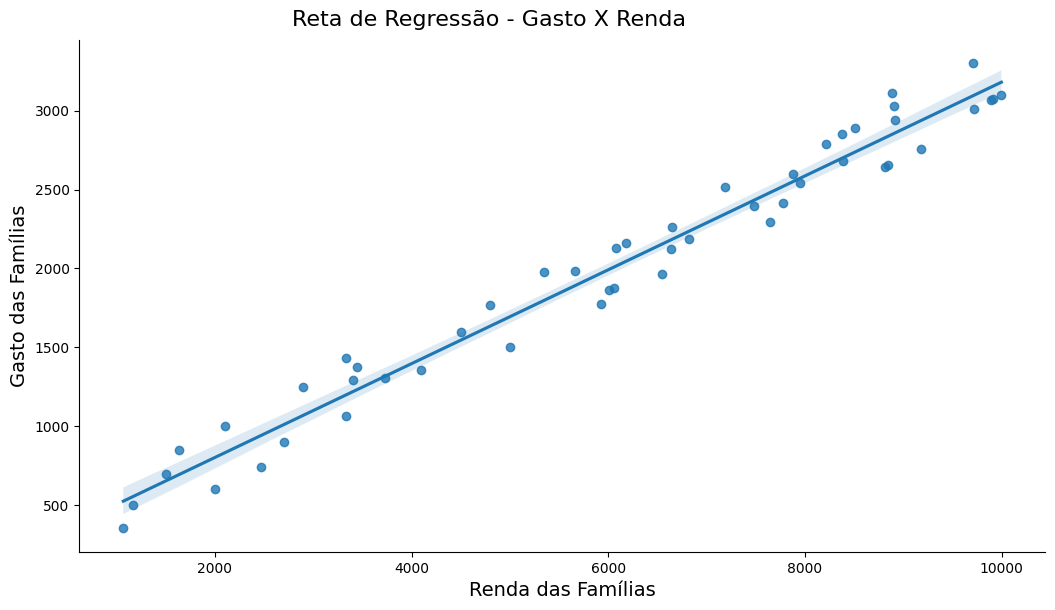

In [8]:
# Cria um gráfico de dispersão, com uma linha de tendência.
ax = sns.lmplot(x="X", y="Y", data=dataset)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Gasto X Renda', fontsize=16, y=1.02)
ax.set_xlabels("Renda das Famílias", fontsize=14)
ax.set_ylabels("Gasto das Famílias", fontsize=14)
ax

In [9]:
# Define as variáveis.
X = sm.add_constant(dataset.X) # Define X, variável independente.
Y = dataset.Y # Define Y, variável dependente.

In [10]:
# Calcula a regressão.
resultado_regressao = sm.OLS(Y, X, missing='drop').fit()

In [11]:
# Mostra um resumo do modelo de regressão.
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1547.
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           3.56e-38
Time:                        23:04:45   Log-Likelihood:                -318.16
No. Observations:                  50   AIC:                             640.3
Df Residuals:                      48   BIC:                             644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.9033     50.127      4.148      0.0

In [12]:
# Exibe os parâmetros da regressão calcula acima com o método OLS(), que é a sigla para mínimos quadrado ordinários.
resultado_regressao.params

const    207.903314
X          0.297291
dtype: float64

In [13]:
# Calcula o intervalo de confinça usando o método conf_int().
resultado_regressao.conf_int(alpha=0.05)

,0,1
const,107.116864,308.689763
X,0.282092,0.312490


In [14]:
# Cria uma previsão de acordo com a amostra, utilizando o método predict().
dataset['Y_previsto_statsmodels'] = resultado_regressao.predict()
dataset.head()

,Y,X,Y_previsto_statsmodels
0,3011,9714,3095.785086
1,1305,3728,1316.203010
2,1879,6062,2010.079483
3,2654,8845,2837.439476
4,2849,8378,2698.604723


In [15]:
# Cria uma previsão, considerando valores fora da amostra.
# Passando como parâmetro a const e o valor do renda para prever o gasto.
resultado_regressao.predict([1, 7510])[0]

2440.556403140435

In [16]:
# Calcula soma dos quadrados dos erros (resíduos), utilizando o método ssr.
SQE = resultado_regressao.ssr
SQE

984986.0375191915

In [17]:
# Calcula o R², coeficiente de determinação, utilizando o método rsquared da biblioteca statsmodels.
R2 = resultado_regressao.rsquared
R2

0.9699003317369297

Solução 1

In [18]:
# Calcula a soma dos quadrados da regressão, utilizando o ess (explained sum of squares) do statsmodels.
SQR = resultado_regressao.ess
SQR

31739163.242480807

Solução 2

In [19]:
# Calcula a soma dos quadrados da regressão SQR, utilizando a biblioteca statsmodels.
SQR = resultado_regressao.mse_model
SQR

31739163.242480807

Solução 1

In [20]:
# Calcula o erro quadrático médio, utilizando o método resid da biblioteca statsmodels.
EQM = resultado_regressao.mse_resid
EQM

20520.54244831649

Solução 2

In [21]:
# Calcula o erro quadrático médio, utilizando o método ssr e resid da biblioteca statsmodels.
EQM = resultado_regressao.ssr / resultado_regressao.df_resid
EQM

20520.54244831649

# Testes aplicados a modelos de regressão

## Teste T

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img030.png" width=90%>

In [22]:
# Calcula a estatística de teste T, utilizando o método tvalues.
resultado_regressao.tvalues[1]

39.32813192675501

## P-valor

Solução 1

In [32]:
# Calcula t, estatística de teste, utilizando o método tvalues.
t = resultado_regressao.tvalues[1]

In [34]:
# Obtem o grau de liberdade (n - 2) direto da regressão.
graus_de_liberdade = resultado_regressao.df_resid
graus_de_liberdade

48.0

In [35]:
# Calcula o p-valor.
p_valor = 2 * (t_student.sf(t, graus_de_liberdade))
p_valor

3.5555432285859883e-38

In [ ]:
# Obtem o grau de liberdade (n - 2) direto da regressão.
graus_de_liberdade = resultado_regressao.df_resid
graus_de_liberdade

48.0

Solução 2

In [24]:
# Calcula o p-valor, utilizando o método pvalues.
p_valor = resultado_regressao.pvalues[1]
p_valor

3.5555432285859883e-38

## Teste F

Testa a significância conjunta dos parâmetros na regressão.

Solução 1

In [25]:
# Calcula a estatística de teste de F.
F = resultado_regressao.mse_model / resultado_regressao.mse_resid
F

1546.7019608482472

Solução 2

In [26]:
# Calcula a estatística de teste de F.
resultado_regressao.fvalue

1546.7019608482472

## P-valor

Solução 1

In [27]:
# Calcula o p-valor.
resultado_regressao.f_pvalue

3.5555432285860227e-38

Solução 2

In [28]:
# Calcula o p-valor, utilizando a função f.sf(), informando como parâmetros: estatística de teste f, k e grau de libertada (n - 2).
p_valor = f.sf(F, 1, 48)
p_valor

3.5555432285860227e-38